## 1. Import libraries and the dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Load the dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('datasets/kc_house_data.csv')
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


## 2. Explore the dataset and data prerocessing

In [3]:
# Dataset shape and type
print('The shape of this dataframe is: {}'.format(df.shape), '\n')
print('The type of each column in the dataset: \n{}'.format(df.dtypes))

The shape of this dataframe is: (21613, 21) 

The type of each column in the dataset: 
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [4]:
# Number of houses having a certain number of bedrooms
df['bedrooms'].value_counts().sort_index()

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [5]:
# Convert the 'date' column to datetime format and extract the date component as a string in the desired format
df['YYYYMMDD'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S').dt.strftime('%Y%m%d')

# Convert the 'YYYYMMDD' column to a numerical format
df['YYYYMMDD'] = pd.to_numeric(df['YYYYMMDD'])
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,YYYYMMDD
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,20141013


In [6]:
# Define new columns for year, month, day
df['YYYY'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d').dt.year
df['MM'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d').dt.month
df['MM'] = df['MM'].astype(str).str.zfill(2)
df['DD'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d').dt.day

# Drop the now useless 'date' column.
if 'date' in df.columns:
    df = df.drop(columns='date')

df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,YYYYMMDD,YYYY,MM,DD
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,20141013,2014,10,13
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,20141209,2014,12,9
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,20150225,2015,02,25
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,20141209,2014,12,9
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,20150218,2015,02,18


In [7]:
# Fill the above defined columns with values extracted from 'YYYYMMDD'
str_year = []
for i in df['YYYY']:
    str_year.append(str(i))
df['YYYY'] = str_year

str_month = []
for i in df['MM']:
    str_month.append(str(i))
df['MM'] = str_month

df['YYYYMM'] = df['YYYY'] + df['MM']

for i in df['YYYYMM']:
    i = int(i)

df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,YYYYMMDD,YYYY,MM,DD,YYYYMM
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,20141013,2014,10,13,201410
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,20141209,2014,12,9,201412
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,20150225,2015,02,25,201502
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,20141209,2014,12,9,201412
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,20150218,2015,02,18,201502


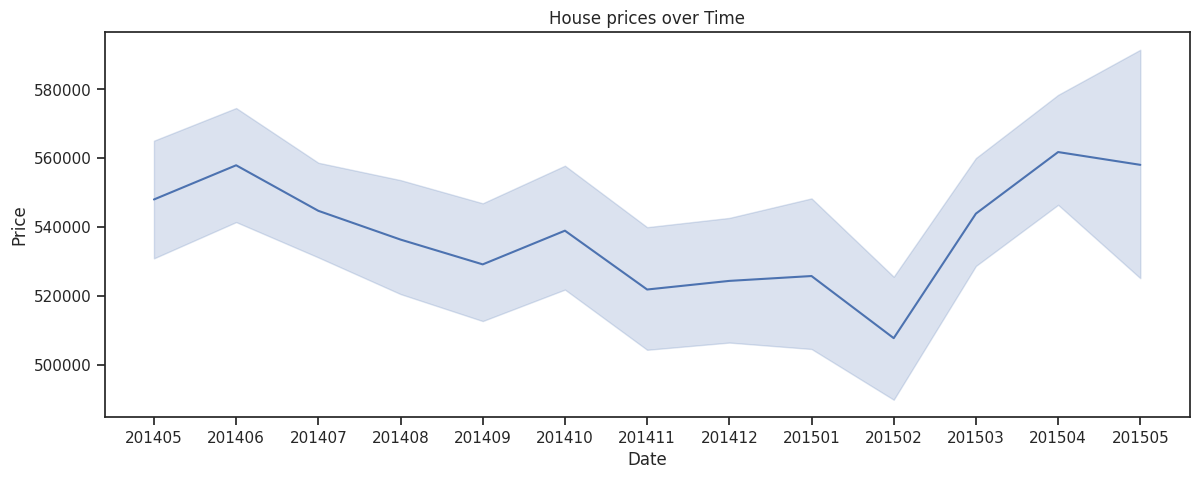

In [8]:
# Plot year_month against price
sns.set_theme(style="ticks")

# Set the size of the figure
plt.figure(figsize=(14, 5))

# Sort the dataframe by the 'year_month' column
df1 = df.sort_values('YYYYMM')

# Create a line plot using seaborn
sns.lineplot(data=df1, x='YYYYMM', y='price')

# Customize the plot using matplotlib.pyplot functions
plt.title('House prices over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [9]:
# Check if there are any id duplicates in the dataset
df_unique = df['id'].nunique()
print(len(df) != df_unique)
print('Number of duplicated house ids: {}'.format(len(df)-df_unique))

True
Number of duplicated house ids: 177


In [10]:
# Find all rows where the 'id' column is duplicated
duplicates = df[df['id'].duplicated(keep=False)]

# Print the duplicates
#duplicates.head(10)

# Define the columns that are allowed to have different values
allowed_columns = ['price', 'date', 'YYYYMMDD', 'YYYYMM', 'YYYY', 'MM', 'DD']

# Compare the cells between the original and duplicate rows for each duplicated id
changes = {}
for id in duplicates['id'].unique():
    group = duplicates[duplicates['id'] == id]
    original = df[df['id'] == id].iloc[0]
    for _, row in group.iterrows():
        if not original.equals(row):
            diff = original.compare(row)
            columns = diff[diff.notna()].index.tolist()
            # Only include columns that are not in the allowed_columns list
            columns = [col for col in columns if col not in allowed_columns]
            if columns:
                changes[id] = columns

# Check if there are any different values in the duplicated id rows other than the allowed columns
if not changes:
    print("There are no different values other than 'price', 'date', 'YYYYMMDD', 'YYYYMM', 'YYYY', 'MM', 'DD' in the duplicated 'id' rows!")
else:
    # Print the columns where the cells are different for each duplicated id
    for id, columns in changes.items():
        print(f"Duplicated id: {id}")
        for col in columns:
            print(f"Column '{col}': {df.loc[df['id'] == id, col].unique().tolist()}")

There are no different values other than 'price', 'date', 'YYYYMMDD', 'YYYYMM', 'YYYY', 'MM', 'DD' in the duplicated 'id' rows!


In [11]:
# Find the duplicates in the id column
duplicates = df[df.duplicated(['id'], keep=False)]
duplicates

# Drop the duplicates
df_unique = df.drop_duplicates()
if len(df) == len(df_unique):
    print('There are no duplicated rows in the dataset! :)')
else:
    print('The dataset CONTAINS some duplicates!')


There are no duplicated rows in the dataset! :)


In [12]:
# Drop rows containing missing values
df2 = df.dropna()
if len(df) == len(df2):
    print('There are no missing values in this dataframe! :)')
else:
    print('There are SOME MISSING VALUES in this dataframe!')

There are no missing values in this dataframe! :)


In [13]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'YYYYMMDD', 'YYYY', 'MM', 'DD',
       'YYYYMM'],
      dtype='object')

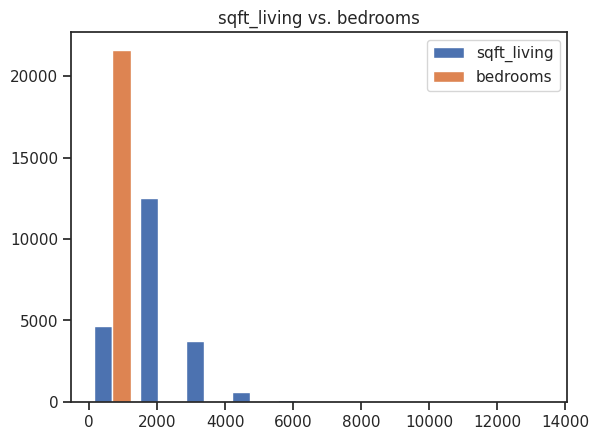

In [14]:
# Plot histograms
def plot_columns_hist(df, x_col, y_col):
    x = df[x_col]
    y = df[y_col]
    plt.hist([x, y], label=[x_col, y_col])
    plt.legend(loc='upper right')
    plt.title(x_col + ' vs. ' + y_col)
    plt.show()

plot_columns_hist(df, 'sqft_living', 'bedrooms')

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
YYYY             0.003576
YYYYMM           0.003061
YYYYMMDD         0.003033
MM              -0.010081
DD              -0.014670
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


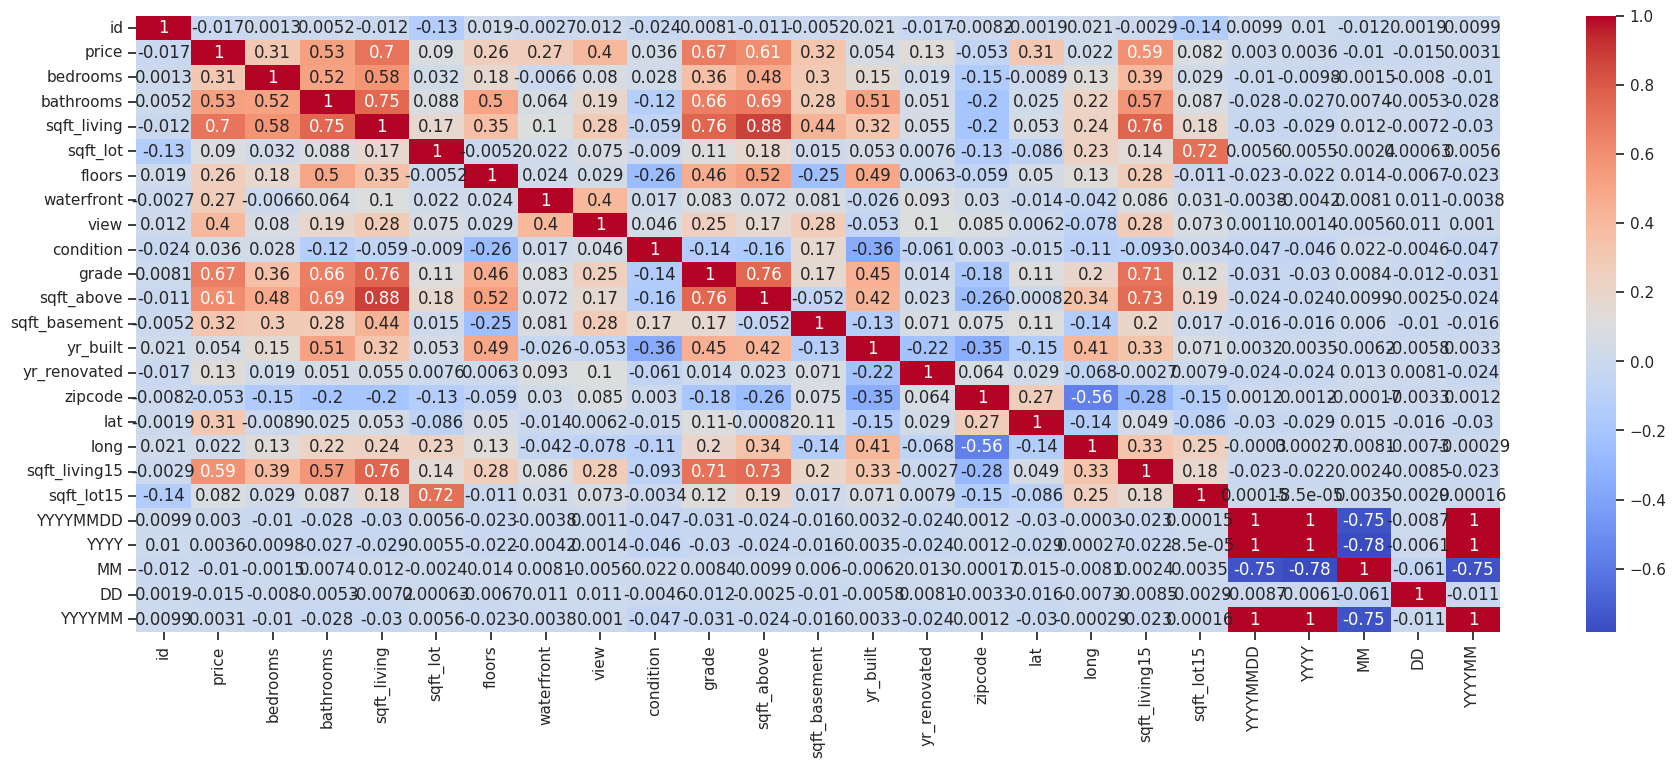

In [15]:
# Create a correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(22,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Sort the correlation matrix in descending order based on the absolute values of the correlation coefficients for the "price" column
corr_with_price = corr_matrix['price'].sort_values(ascending=False)

# Print out the features with the most impact on the "price" column
print(corr_with_price)

In [16]:
# Select the features with correlation greater than a threshold
threshold = 0.5
corr_features_price = set()
for i in range(len(corr_with_price.index)):
    for j in range(i):
        if abs(corr_with_price.iloc[i]) > threshold:
            colname = corr_with_price.index[i]
            corr_features_price.add(colname)

# Create a new dataset with the selected features
selected_features = list(corr_features_price)

# Print the selected features
print("Selected Features:", selected_features)


Selected Features: ['sqft_living15', 'grade', 'sqft_above', 'sqft_living', 'bathrooms']


In [17]:
final_df = df.loc[:, ['sqft_living15', 'bathrooms', 'sqft_above', 'grade', 'sqft_living', 'price']]
final_df.head()

,sqft_living15,bathrooms,sqft_above,grade,sqft_living,price
0,1340,1.00,1180,7,1180,221900.0
1,1690,2.25,2170,7,2570,538000.0
2,2720,1.00,770,6,770,180000.0
3,1360,3.00,1050,7,1960,604000.0
4,1800,2.00,1680,8,1680,510000.0


# 3. Training & analyzing models

We propose comparing a linear regression model to a random forest regressor.

## 3.1. Linear model

Compared to the random forest model, the linear model is quite basic. 

In [18]:
# Split the dataset into features and target variable
X = final_df.drop('price', axis=1)
y = final_df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Define the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print('Mean squared error:', mse)

Mean squared error: 68325878138.50509


## 3.2. Random forest model

The random forest uses a collection of decision trees and majority voting to make predictions. Its many hyperparameters are:

1. max_depth: Max depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node. Default = None

2. min_sample_split: Tells the decision tree in a random forest the minimum required number of observations in any given node to split it. Default = 2

3. max_leaf_nodes: Sets a condition on the splitting of the nodes in the tree and hence restricts the growth of the tree. Default = None

4. min_samples_leaf: Specifies the minimum number of samples that should be present in the leaf node after splitting a node. Default = 1

5. n_estimators: Number of trees in the forest.

6. max_sample: The max_samples hyperparameter determines what fraction of the original dataset is given to any individual tree.

7. max_features: This resembles the number of maximum features provided to each tree in a random forest. Default = 1

8. bootstrap: Method for sampling data points (with or without replacement). Default = True

9. criterion: Function to measure the quality of a split. Default = squared error

In [20]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(max_depth=2, random_state=0)
rforest.fit(X_train, y_train)
ypred = rforest.predict(X_test)


RandomForestRegressor(max_depth=2, random_state=0)

In [21]:
#define different models and train them
## one model from the course and one model not included in the course
## for the second model: parameters and hyper-parameters
## for the second model: explain how its hyper-parameters are related to the bias-variance tradeoff
## https://www.sciencedirect.com/science/article/pii/S0370157319300766